# Used Car Price Prediction (XGBoost)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cars_data.csv")

In [3]:
df.isnull().sum()

,0
Make,0
Model,0
Type,0
Origin,0
DriveTrain,0
MSRP,0
EngineSize,0
Cylinders,2
Horsepower,0
MPG_City,0


In [4]:
df = df.dropna()

In [5]:
df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype("int")


In [6]:
df_new = pd.get_dummies(df, columns= ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])

In [12]:
X = df_new.drop("MSRP", axis=1)
y = df_new["MSRP"]

In [13]:
X

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,Make_Audi,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,3.5,6.0,265,17,23,4451,106,189,True,False,...,False,False,False,False,True,False,False,True,False,False
1,2.0,4.0,200,24,31,2778,101,172,True,False,...,True,False,False,False,True,False,False,False,True,False
2,2.4,4.0,200,22,29,3230,105,183,True,False,...,True,False,False,False,True,False,False,False,True,False
3,3.2,6.0,270,20,28,3575,108,186,True,False,...,True,False,False,False,True,False,False,False,True,False
4,3.5,6.0,225,18,24,3880,115,197,True,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2.4,5.0,197,21,28,3450,105,186,False,False,...,True,False,False,False,False,True,False,False,True,False
424,2.3,5.0,242,20,26,3450,105,186,False,False,...,True,False,False,False,False,True,False,False,True,False
425,2.9,6.0,268,19,26,3653,110,190,False,False,...,True,False,False,False,False,True,False,False,True,False
426,1.9,4.0,170,22,29,2822,101,180,False,False,...,False,False,False,True,False,True,False,False,True,False


In [14]:
y

,MSRP
0,36945
1,23820
2,26990
3,33195
4,43755
...,...
423,40565
424,42565
425,45210
426,26135


In [33]:
import numpy as np

In [34]:
X = np.array(X)
y= np.array(y)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [45]:
import pickle

# Train and save the model if it doesn't exist.
try:
    with open('linear_model.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    print("Model file not found. Training and saving a new model.")
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)  # Assuming X_train and y_train are defined.
    with open('linear_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Now the model is loaded/trained, you can proceed.
prediction = model.predict(X_test)
print(prediction)


Model file not found. Training and saving a new model.
[31876.6682811  53813.11095709 53233.40711006 35594.04662829
 20362.0646248  43217.50674763 37760.82572256 26586.87706637
 84327.49506158 31729.24666386 21216.64130272 45374.82403485
 20250.17766947 29489.35971684 29371.31185118 16011.14444148
 21032.06349269 36133.44873307 27215.13258217  8349.7866869
 46526.49783784 36174.4168421  10715.27725039 32908.51210518
 16145.15384085 32409.5327128  34296.29607557 79946.52201685
 73487.9088501  37583.37239296 34294.24147516 14219.08735295
 31302.29778008 36526.95359266 56621.23402397 46280.18895845
 13301.62236322 18627.96490253 24418.19236019 34922.28715703
 61261.32143677 49863.93458961 37813.04321985 13132.8641143
 36129.47242684 54376.95187194 39888.33847333 33450.85383142
 31155.84003824 26572.42933923 30490.44086076 89252.29499583
 64739.75551884 52123.36294441 44060.08017613 37427.49523703
 37813.04321985 57171.69522332 17312.07657068 31959.91004032
 30296.40224843 45674.82182565 3

In [46]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
score = linear_model.score(X_test, y_test)

In [47]:
print(score)

0.7887290652043992


# Decision Tree Regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.07290909605375717

# Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.6324854676456592

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for preprocessing
import numpy as np # Importing numpy for square root calculation


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
}

# Dictionary to hold results
results = {}

# Create a preprocessor - StandardScaler is used as an example.
# You may need to adjust this based on your specific preprocessing needs.
preprocessor = StandardScaler() # Defining the preprocessor

# Loop through models and evaluate
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'R² Score': r2_score(y_test, y_pred),
        # Calculate RMSE manually using NumPy's square root
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T.sort_values(by='R² Score', ascending=False)
print(results_df)

                   R² Score          RMSE          MAE
Linear Regression  0.788866   7472.236679  5207.839008
XGBoost            0.668157   9367.806574  5785.786621
Random Forest      0.654779   9554.763361  5676.840930
Decision Tree      0.066676  15710.412496  7899.139535


# EDA ****

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [57]:
# Basic descriptive stats
print(df.describe(include='all'))


          Make    Model   Type Origin DriveTrain           MSRP  EngineSize  \
count      426      426    426    426        426     426.000000  426.000000   
unique      38      423      6      3          3            NaN         NaN   
top     Toyota  G35 4dr  Sedan   Asia      Front            NaN         NaN   
freq        28        2    262    156        226            NaN         NaN   
mean       NaN      NaN    NaN    NaN        NaN   32804.549296    3.205634   
std        NaN      NaN    NaN    NaN        NaN   19472.460825    1.103520   
min        NaN      NaN    NaN    NaN        NaN   10280.000000    1.400000   
25%        NaN      NaN    NaN    NaN        NaN   20324.750000    2.400000   
50%        NaN      NaN    NaN    NaN        NaN   27807.500000    3.000000   
75%        NaN      NaN    NaN    NaN        NaN   39225.000000    3.900000   
max        NaN      NaN    NaN    NaN        NaN  192465.000000    8.300000   

         Cylinders  Horsepower    MPG_City  MPG_Hig

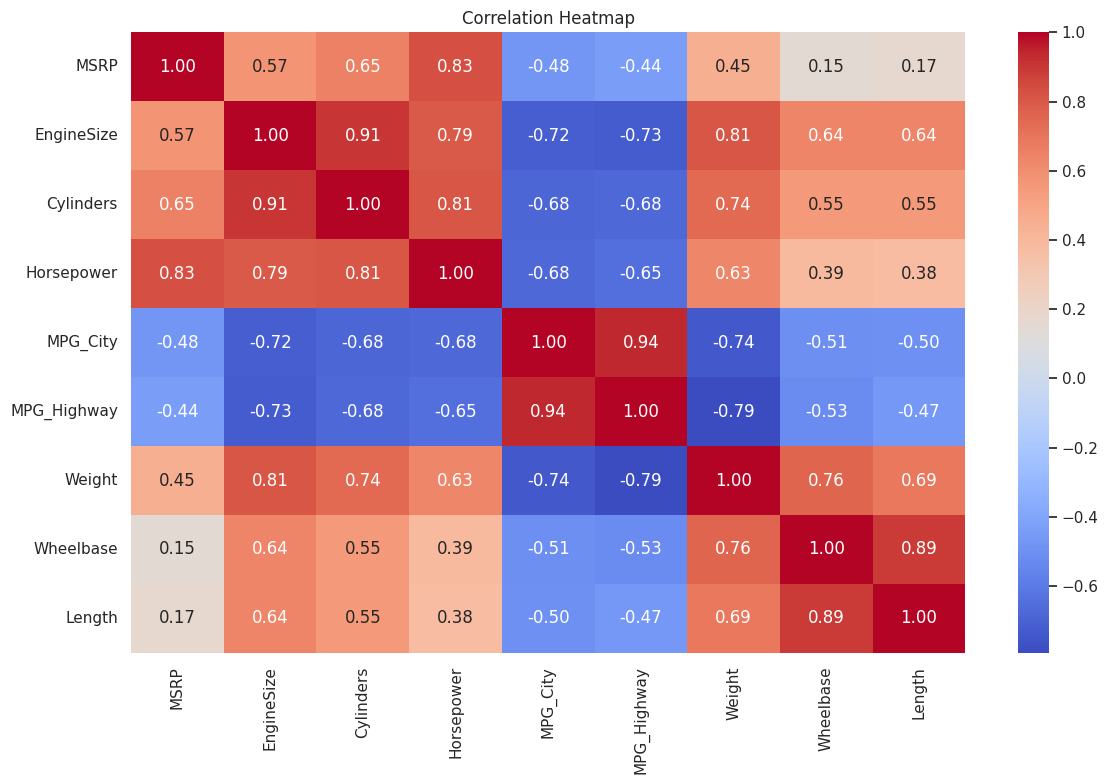

In [58]:
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


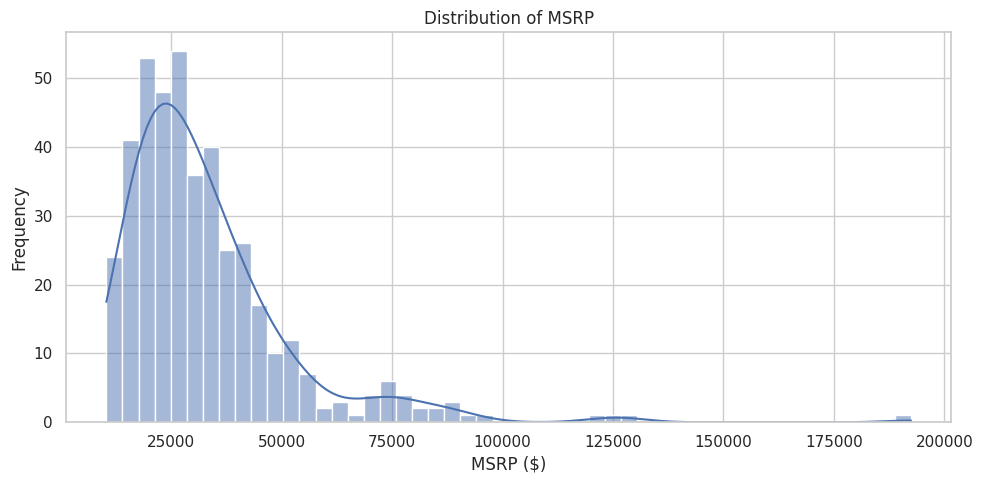

In [59]:
# Histogram of MSRP
plt.figure(figsize=(10, 5))
sns.histplot(df['MSRP'], bins=50, kde=True)
plt.title("Distribution of MSRP")
plt.xlabel("MSRP ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

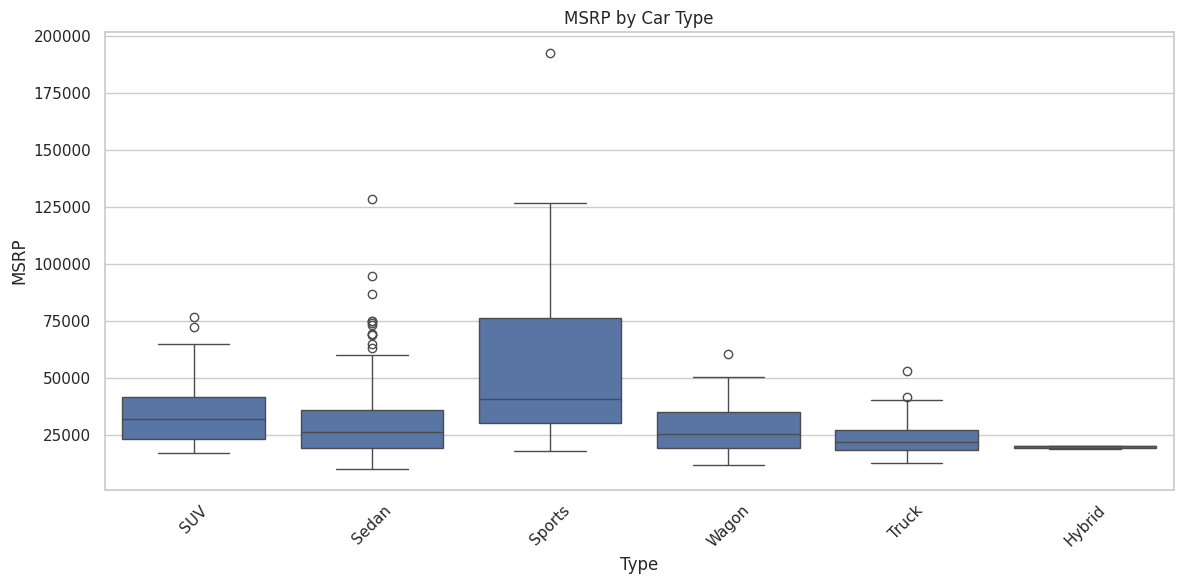

In [60]:
# Boxplot: MSRP by Car Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='MSRP', data=df)
plt.xticks(rotation=45)
plt.title("MSRP by Car Type")
plt.tight_layout()
plt.show()


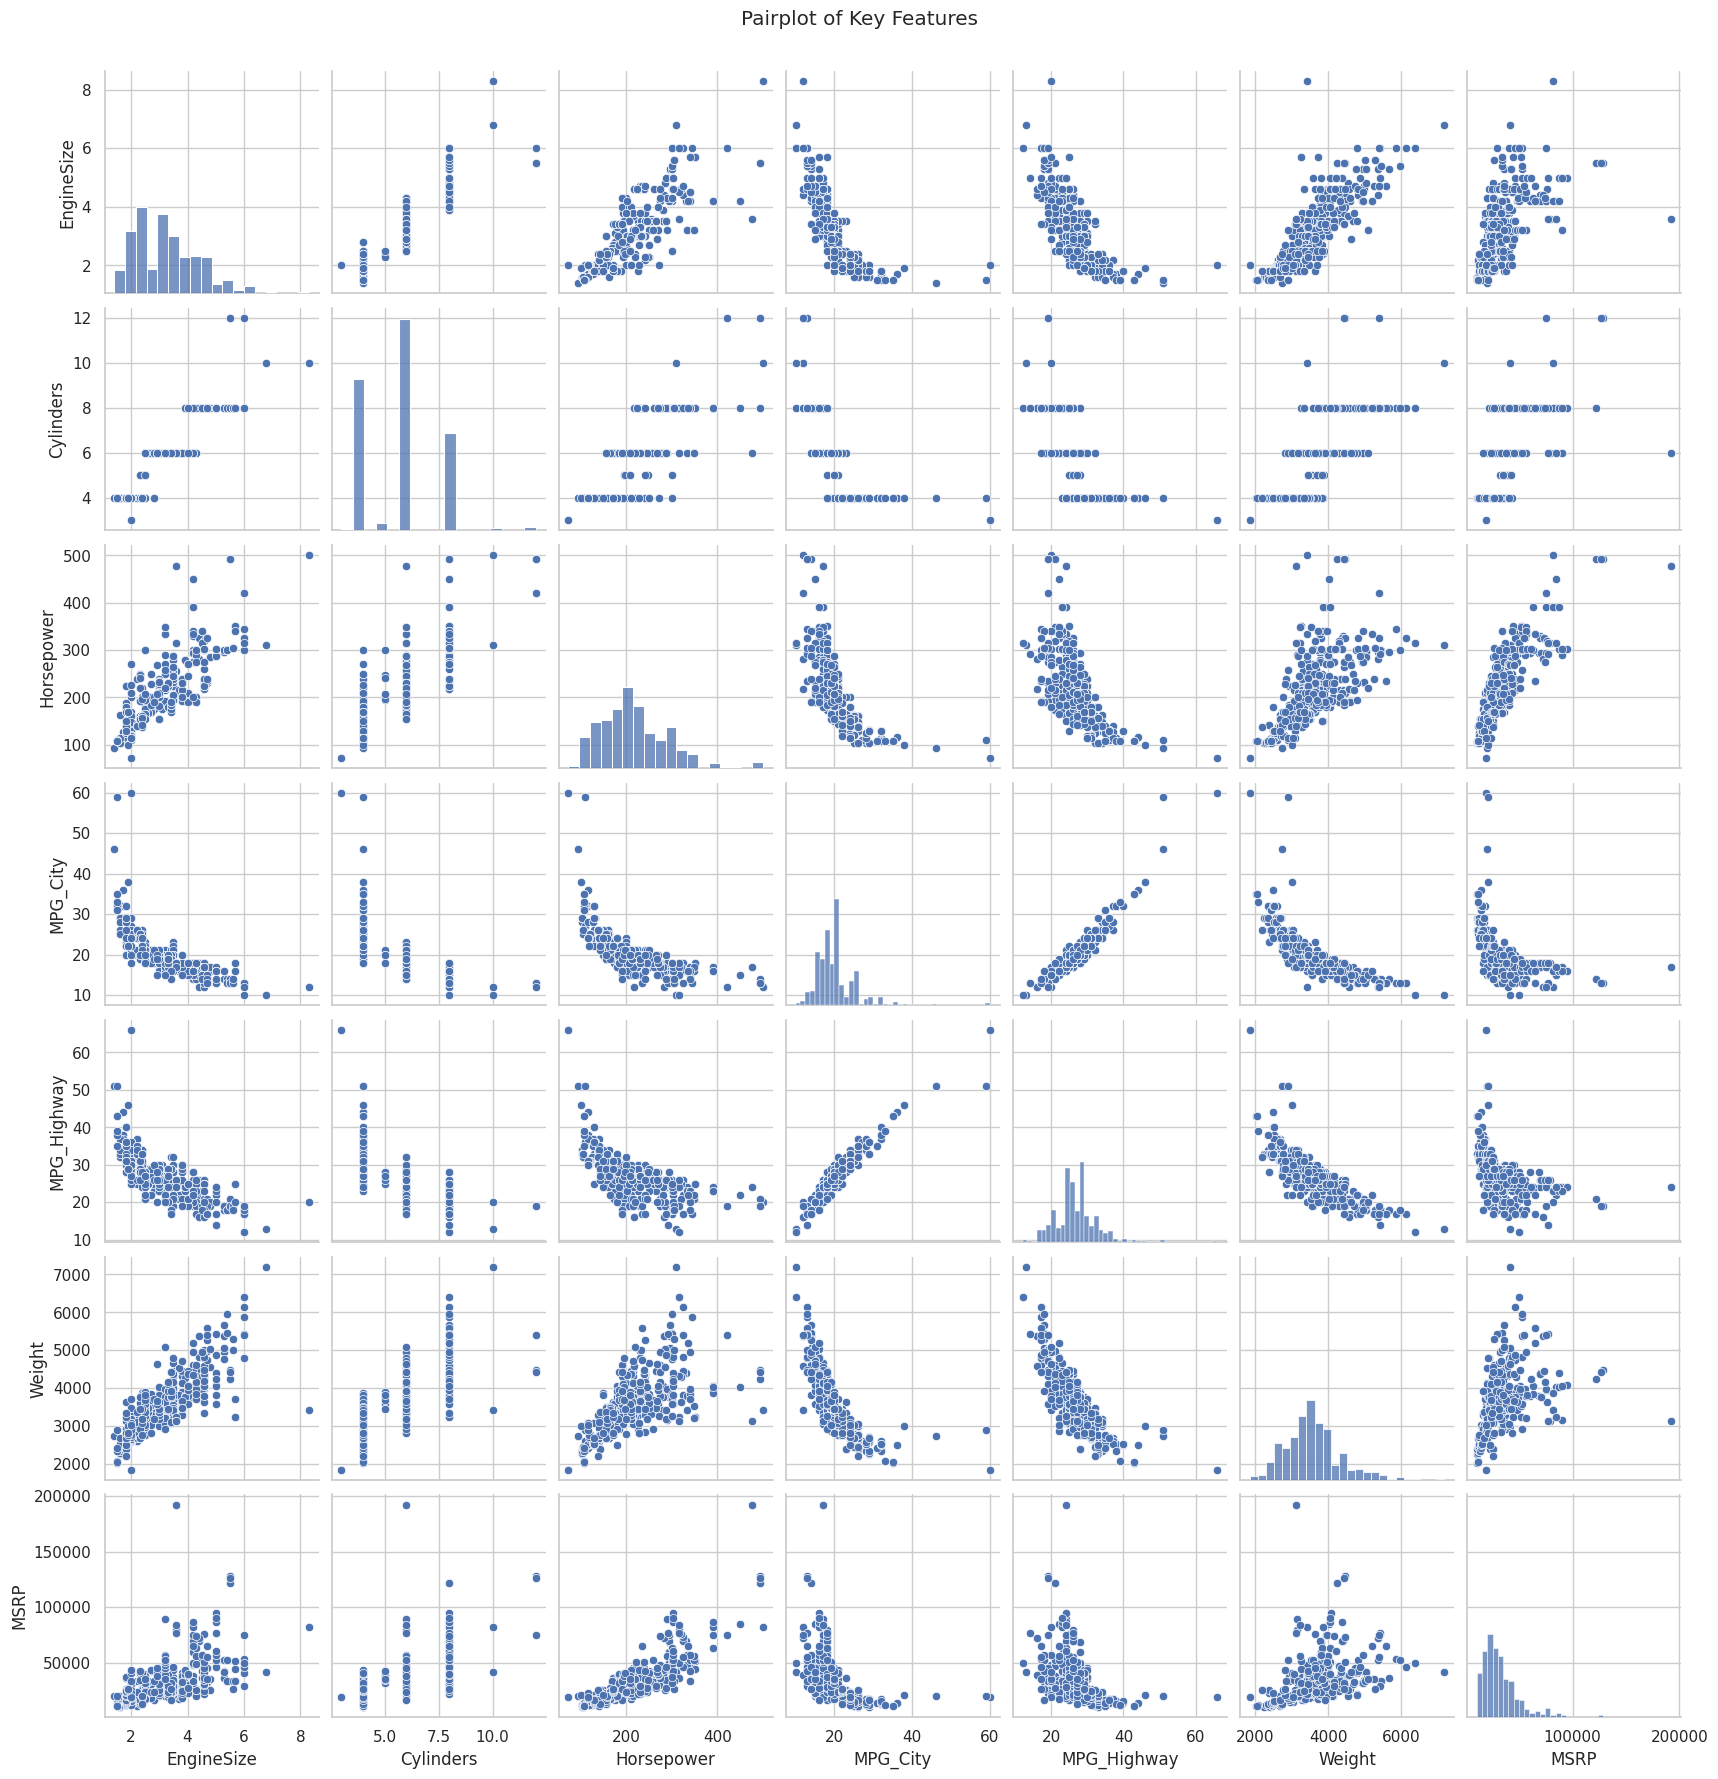

In [61]:
# Pairplot of selected numeric features
selected_features = ['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'MSRP']
sns.pairplot(df[selected_features])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()
